In [33]:
from Framework.NodeContainer import NodeContainer
from ArxivCrawler.ArxivNodeFactory import ArxivNodeFactory
import networkx as nx
from operator import itemgetter
import matplotlib.pyplot as plt

### Read dataset

In [2]:
data_container = NodeContainer()
# save_path = "./result_arxiv.xml"
save_path = "./result_3.xml"
node_factory = ArxivNodeFactory()
data_container.Load(save_path, node_factory)

### initiate Arxiv co-author Graph

In [3]:
G = nx.DiGraph()

for paper in data_container.NodeMap['ArxivPaperNode']:
    first_author = paper.AuthorList[0]
    G.add_node(first_author)
    co_authors = paper.AuthorList[1:]
    for co_author in co_authors:
        G.add_node(co_author)
        G.add_edge(co_author,first_author)

print(f"Total nodes in graph: {G.number_of_nodes()}")
print(f"Total edges in graph: {G.number_of_edges()}")

Total nodes in graph: 15173
Total edges in graph: 23577


### visualization graph
- sorted by top 500 degree centrality

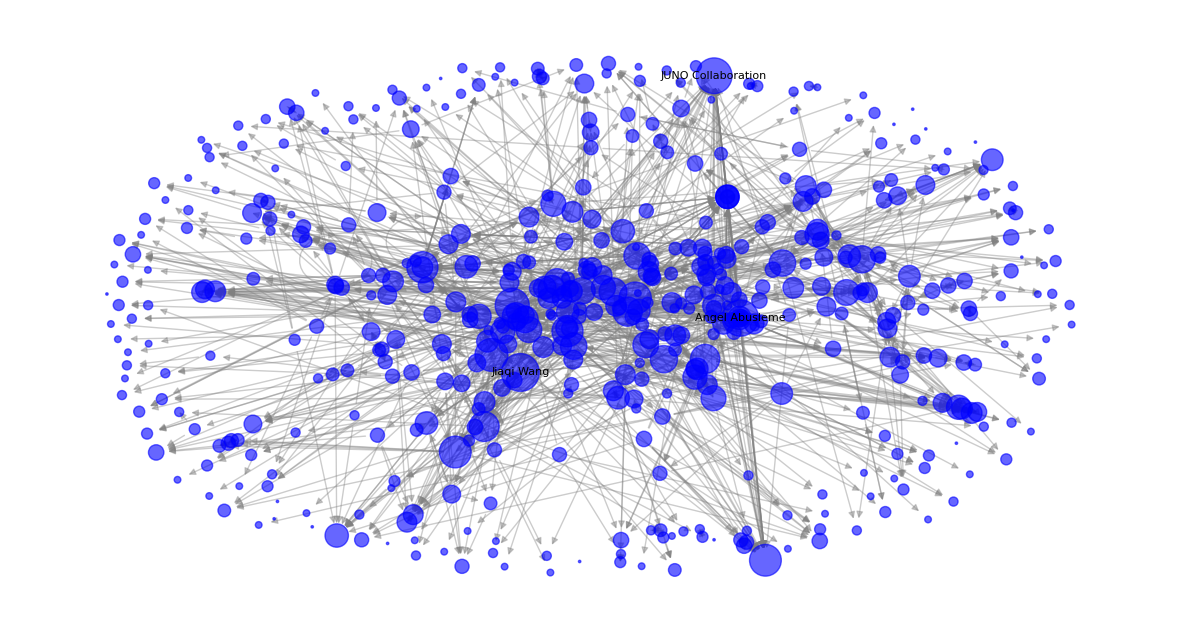

In [4]:


# Assuming 'subgraph' has already been defined with the top 500 nodes by degree
# Set the seed for reproducibility
seed = 13648
# Sort nodes by degree and get the top 500
top_nodes = sorted(G.degree(), key=itemgetter(1), reverse=True)[:500]
 
# Extract just the node names from the top_nodes
top_nodes = [node for node, degree in top_nodes]

# Create a subgraph with just the top 500 nodes
subgraph = G.subgraph(top_nodes)
# Compute the positions of the nodes using one of the layout algorithms
pos = nx.spring_layout(subgraph, seed=seed)
 
# Define node sizes based on degree
node_sizes = [3 + 20 * subgraph.degree(n) for n in subgraph.nodes()]

# Optionally, define node labels for nodes with the highest degrees
# Selecting the top X nodes by degree to label
top_degree_nodes = sorted(subgraph.degree(), key=itemgetter(1), reverse=True)[:3]  # Adjust X to your preference
node_labels = {node: node for node, _ in top_degree_nodes}
# Change plot size here
plt.figure(figsize=(15, 8))  # Set the figure size (width, height) in inches

# Draw the nodes
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='blue', alpha=0.6)

# Draw the edges
edges = nx.draw_networkx_edges(
    subgraph,
    pos,
    width=1,
    edge_color='gray',
    alpha=0.4  # Adjust edge transparency
)

# Draw the node labels for the top X nodes
nx.draw_networkx_labels(subgraph, pos, labels=node_labels, font_size=8)
# plt.figure(figsize=(15, 10))
plt.axis('off')  # Turn off the axis
plt.show()


In [14]:
top_nodes = sorted(G.degree(), key=itemgetter(1), reverse=True)[:10]
 
# Extract just the node names from the top_nodes
top_nodes = [degree for node, degree in top_nodes]
top_nodes

[939, 757, 749, 696, 663, 625, 424, 329, 229, 141]

### plot histogram

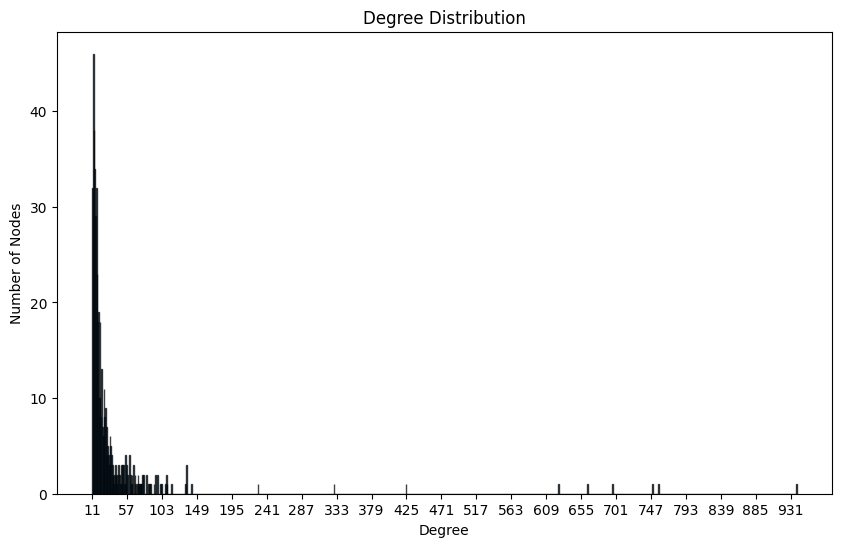

In [20]:
G500 = sorted(G.degree(), key=itemgetter(1), reverse=True)[:500]
# Calculate degrees of all nodes
degrees = [degree for node, degree in G500]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1, 1), alpha=0.75, edgecolor='black')
# plt.hist(degrees, bins=50, alpha=0.75, edgecolor='black')  # Let Matplotlib choose the number of bins

plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
# plt.xticks(range(min(degrees), max(degrees) + 1, 1))  # Ensure ticks match the degree values
plt.xticks(range(min(degrees), max(degrees) + 1, max(1, (max(degrees) - min(degrees)) // 20)))
plt.show()

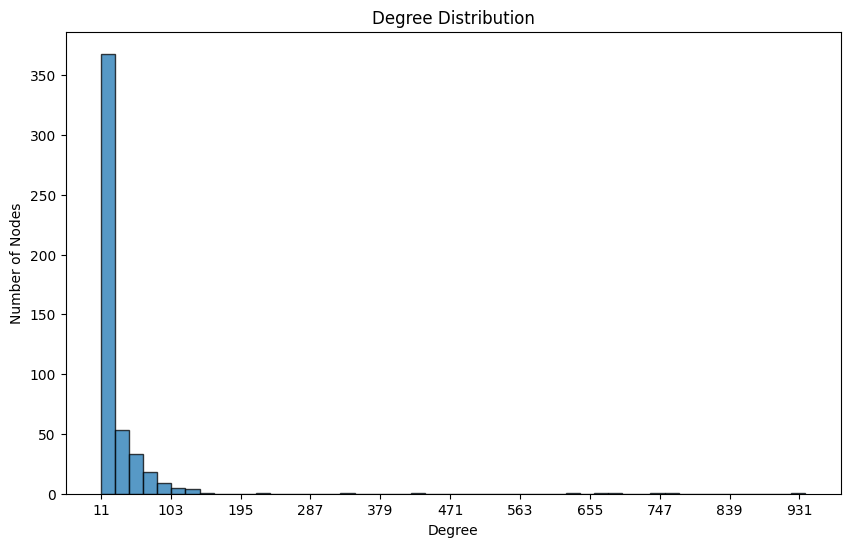

In [11]:
import matplotlib.pyplot as plt
from operator import itemgetter
import networkx as nx

# Assuming G is your NetworkX graph, e.g., G = nx.gnp_random_graph(1000, 0.05)

# Sort the nodes of the graph G by degree in descending order and take the top 500
G500 = sorted(G.degree(), key=itemgetter(1), reverse=True)[:500]
# Calculate degrees of all nodes
degrees = [degree for node, degree in G500]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, alpha=0.75, edgecolor='black')

plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

# Set x-ticks to be integer values and ensure ticks match the degree values
# It's possible that range(min(degrees), max(degrees) + 1) creates too many ticks,
# If so, you can use a larger step size or use plt.xticks([]) to hide the x-ticks completely
plt.xticks(range(min(degrees), max(degrees) + 1, max(1, (max(degrees) - min(degrees)) // 10)))

plt.show()


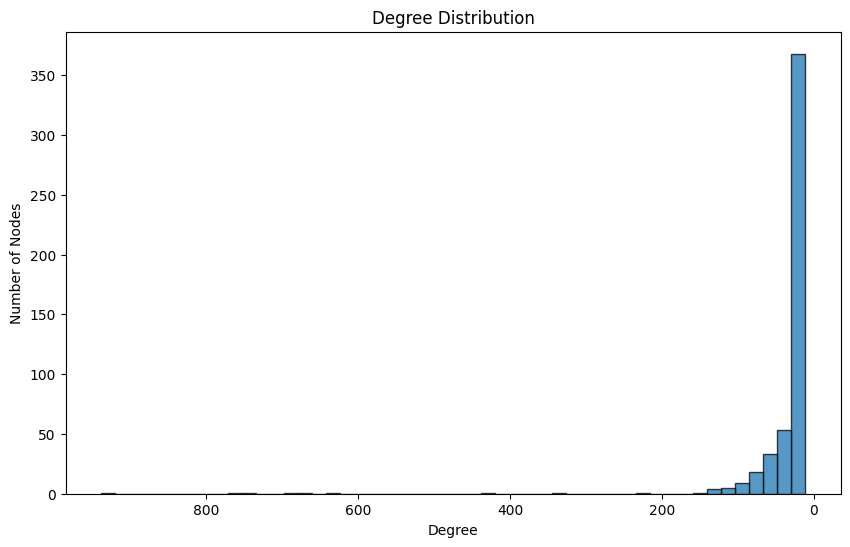

In [15]:
# Sort the nodes of the graph G by degree in descending order and take the top 500
G500 = sorted(G.degree(), key=itemgetter(1), reverse=True)[:500]
# Calculate degrees of all nodes
degrees = [degree for node, degree in G500]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, alpha=0.75, edgecolor='black')

plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

# Invert x-axis
plt.gca().invert_xaxis()

plt.show()

In [23]:
# Get the top 500 nodes by degree
top_500_nodes = [node for node, degree in sorted(G.degree(), key=itemgetter(1), reverse=True)[:500]]

# Create a subgraph with these nodes
G500 = G.subgraph(top_500_nodes)
clustering_coefficient = nx.average_clustering(G500)
clustering_coefficient

0.18676116297862116

In [27]:
pagerank = nx.pagerank(G500)
pagerank

{'Tulasi N. Parashar': 0.00212564739760538,
 'Nicholas Heller': 0.0023917881149441195,
 'Yue Zhou': 0.001163193798864172,
 'Jinwoo Lee': 0.0006837738590369177,
 'Xian Liu': 0.0007457796211266724,
 'Ryan Dorosh': 0.0006837738590369177,
 'Yiqi Lin': 0.00159325081838503,
 'Peng Di': 0.002062507613404551,
 'Yuanchun Li': 0.002591337097906222,
 'Jianqiang Xia': 0.0006837738590369177,
 'Shilin Xu': 0.0014596499630093788,
 'Bin Wang': 0.003025290772890165,
 'Haoyu Wang': 0.0025497346161965128,
 'James L. Burch': 0.0006837738590369177,
 'Yi-Wen Liu': 0.004405904733684987,
 'Youwei Liang': 0.005406995978487034,
 'Xu Yan': 0.0014038767933520695,
 'Tao Chen': 0.0013369334095637863,
 'Wenlian Lu': 0.0007941709096122404,
 'Qi Zhang': 0.0006837738590369177,
 'Patrick Bilic': 0.0035267048698352974,
 'Hong Yan': 0.0011363980363582452,
 'Tao Gong': 0.002009803818222236,
 'Hao Yang': 0.0023370487016683528,
 'Jun Ma': 0.002334436418187693,
 'Limin Liu': 0.0007941709096122404,
 'Jiaxing Wen': 0.0009030207

In [29]:
diameter = nx.diameter(G)
diameter

NetworkXError: Found infinite path length because the digraph is not strongly connected

In [31]:
closeness_centrality = nx.closeness_centrality(G500)
closeness_centrality

{'Tulasi N. Parashar': 0.05206534092234119,
 'Nicholas Heller': 0.07077266420953796,
 'Yue Zhou': 0.06313473607610327,
 'Jinwoo Lee': 0.0,
 'Xian Liu': 0.004008016032064128,
 'Ryan Dorosh': 0.0,
 'Yiqi Lin': 0.06717940385275055,
 'Peng Di': 0.05687124827021248,
 'Yuanchun Li': 0.049950044180580175,
 'Jianqiang Xia': 0.0,
 'Shilin Xu': 0.06458302669368869,
 'Bin Wang': 0.07980050469547895,
 'Haoyu Wang': 0.01282565130260521,
 'James L. Burch': 0.0,
 'Yi-Wen Liu': 0.0071571714858288,
 'Youwei Liang': 0.06639610295130434,
 'Xu Yan': 0.04545207047627395,
 'Tao Chen': 0.06722178760372796,
 'Wenlian Lu': 0.0045090180360721445,
 'Qi Zhang': 0.0,
 'Patrick Bilic': 0.07769585124294544,
 'Hong Yan': 0.049749610414305256,
 'Tao Gong': 0.06343310439404327,
 'Hao Yang': 0.042395593461085145,
 'Jun Ma': 0.06943934380388685,
 'Limin Liu': 0.0045090180360721445,
 'Jiaxing Wen': 0.041963276901831506,
 'Luhong Wang': 0.004008016032064128,
 'Qiuyuan Huang': 0.053867974220966126,
 'Colby C. Haggerty': 0.0

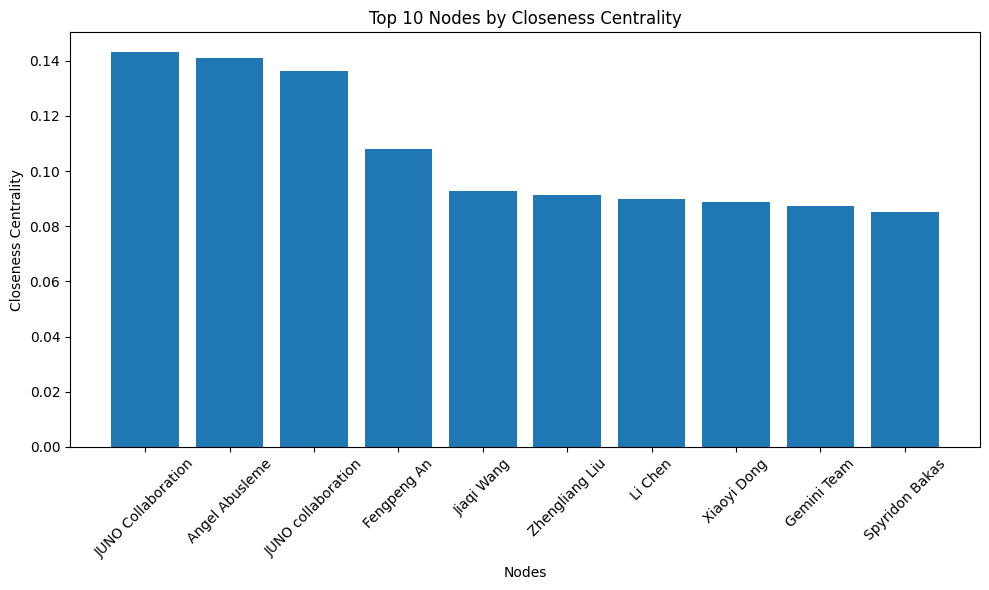

In [40]:
# Assuming G500 is your graph
closeness_centrality = nx.closeness_centrality(G500)

# Sort nodes by closeness centrality in descending order and select top 10
top_10_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Unpack the nodes and their closeness centrality values
nodes, centralities = zip(*top_10_nodes)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(nodes)), centralities, tick_label=nodes)

# Adding labels and title
plt.xlabel('Nodes')
plt.ylabel('Closeness Centrality')
plt.title('Top 10 Nodes by Closeness Centrality')
plt.xticks(rotation=45)  # Rotate node labels to improve readability

# Show the plot
plt.tight_layout()
plt.show()

In [32]:
betweenness_centrality = nx.betweenness_centrality(G500)
betweenness_centrality

{'Tulasi N. Parashar': 0.016158821583224608,
 'Nicholas Heller': 0.0,
 'Yue Zhou': 0.0003613653008828902,
 'Jinwoo Lee': 0.0,
 'Xian Liu': 0.0,
 'Ryan Dorosh': 0.0,
 'Yiqi Lin': 0.0004097281066882922,
 'Peng Di': 0.0,
 'Yuanchun Li': 0.0,
 'Jianqiang Xia': 0.0,
 'Shilin Xu': 0.0006988542010392941,
 'Bin Wang': 0.02950350508237368,
 'Haoyu Wang': 0.0013838922825570822,
 'James L. Burch': 0.0,
 'Yi-Wen Liu': 3.219289985593677e-05,
 'Youwei Liang': 0.0,
 'Xu Yan': 2.0120562409960485e-05,
 'Tao Chen': 0.0,
 'Wenlian Lu': 0.0,
 'Qi Zhang': 0.0,
 'Patrick Bilic': 0.0,
 'Hong Yan': 0.004503644568412658,
 'Tao Gong': 0.004250938288893717,
 'Hao Yang': 0.030441558197672833,
 'Jun Ma': 0.0010352364702631504,
 'Limin Liu': 0.0,
 'Jiaxing Wen': 0.0,
 'Luhong Wang': 0.0,
 'Qiuyuan Huang': 0.002340021408278404,
 'Colby C. Haggerty': 0.002380272851335459,
 'Hong-Guang Duan': 0.0012240008799392626,
 'Yirong Wang': 0.0,
 'Tai Wang': 0.0002234132956420906,
 'Hongyang Li': 0.006736354713634577,
 'STAR Co

In [39]:
nx.eigenvector_centrality(G500)

{'Tulasi N. Parashar': 2.8470763117238614e-05,
 'Nicholas Heller': 0.00027279391310771294,
 'Yue Zhou': 0.04648162547228062,
 'Jinwoo Lee': 3.7811122619685583e-34,
 'Xian Liu': 3.289567667912647e-32,
 'Ryan Dorosh': 3.7811122619685583e-34,
 'Yiqi Lin': 0.09430562251769126,
 'Peng Di': 0.0001303436113005205,
 'Yuanchun Li': 0.0001130660965123847,
 'Jianqiang Xia': 3.7811122619685583e-34,
 'Shilin Xu': 0.03826192351075641,
 'Bin Wang': 0.2659152207624182,
 'Haoyu Wang': 5.0202920252916114e-08,
 'James L. Burch': 3.7811122619685583e-34,
 'Yi-Wen Liu': 7.712239823655727e-16,
 'Youwei Liang': 0.015874201970121255,
 'Xu Yan': 0.00015843476903315266,
 'Tao Chen': 0.0007952141759888445,
 'Wenlian Lu': 2.6918318152881585e-15,
 'Qi Zhang': 3.7811122619685583e-34,
 'Patrick Bilic': 0.0017771638786581597,
 'Hong Yan': 0.0002373886982588597,
 'Tao Gong': 0.07465078907182864,
 'Hao Yang': 3.5541976946875397e-06,
 'Jun Ma': 0.000420591932042199,
 'Limin Liu': 2.6918318152881585e-15,
 'Jiaxing Wen': 8

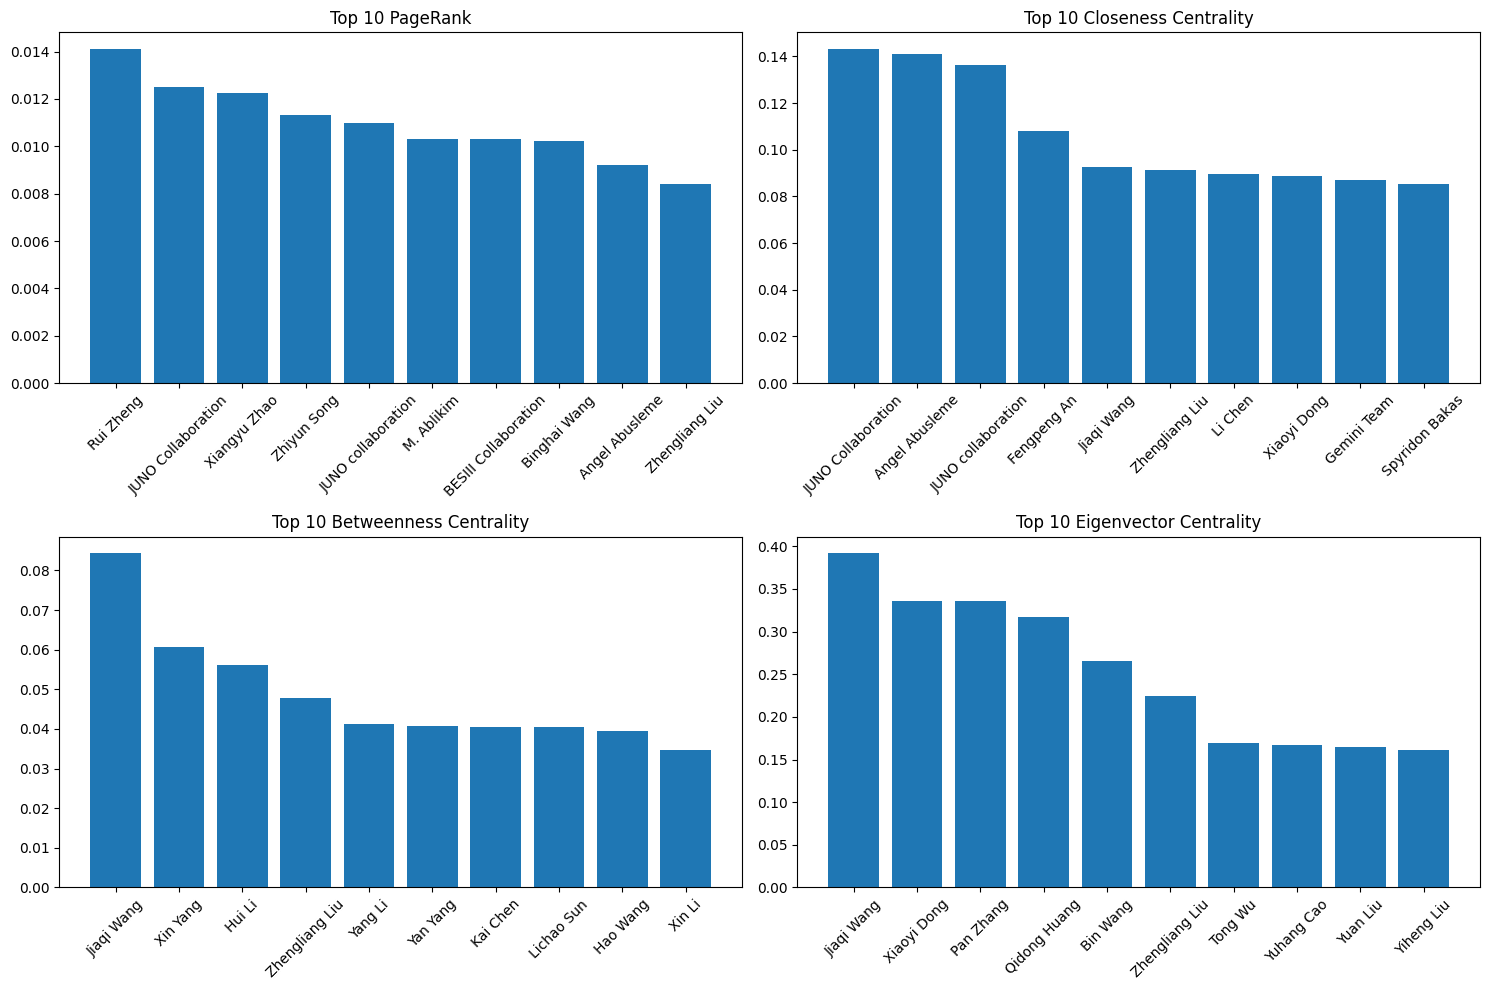

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming G500 is your NetworkX graph
pagerank = nx.pagerank(G500)
closeness_centrality = nx.closeness_centrality(G500)
betweenness_centrality = nx.betweenness_centrality(G500)
eigenvector_centrality = nx.eigenvector_centrality(G500)

# Function to sort and get top 10
def get_top_10(centrality_dict):
    return sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:10]

# Getting top 10 for each centrality measure
top_10_pagerank = get_top_10(pagerank)
top_10_closeness = get_top_10(closeness_centrality)
top_10_betweenness = get_top_10(betweenness_centrality)
top_10_eigenvector = get_top_10(eigenvector_centrality)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Helper function to plot top 10 nodes for a centrality measure
def plot_top_10(ax, top_10, title):
    nodes, values = zip(*top_10)
    ax.bar(range(len(nodes)), values, tick_label=nodes)
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)

# PageRank
plot_top_10(axs[0, 0], top_10_pagerank, 'Top 10 PageRank')

# Closeness Centrality
plot_top_10(axs[0, 1], top_10_closeness, 'Top 10 Closeness Centrality')

# Betweenness Centrality
plot_top_10(axs[1, 0], top_10_betweenness, 'Top 10 Betweenness Centrality')

# Eigenvector Centrality
plot_top_10(axs[1, 1], top_10_eigenvector, 'Top 10 Eigenvector Centrality')

plt.tight_layout()
plt.show()
